In [1]:
import pandas as p
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

In [2]:
# vamos começar trabalhando com as listas separadas por causa do tamanho total: milhões de linhas na tabela (uma para cada entrada na dívida em múltiplos anos) demandam memória demais

arquivos = glob.glob('n_prev/*.csv')
lista = []
for f in arquivos:
  estado = p.read_csv(f, encoding='iso-8859-1', sep=';').filter(items=['TIPO_PESSOA', 'DATA_INSCRICAO', 'VALOR_CONSOLIDADO'])  # limitando as colunas para economizar memória
  lista.append(estado)

def filtraAno(ds, ano):
  filtro = ds['DATA_INSCRICAO'].str.contains(str(ano))
  ds = ds[filtro]
  return ds

n_prev2020 = filtraAno(p.concat(lista), 2020)

del lista


In [3]:
arquivos = glob.glob('prev/*.csv')
lista = []
for f in arquivos:
  estado = p.read_csv(f, encoding='iso-8859-1', sep=';').filter(items=['TIPO_PESSOA', 'DATA_INSCRICAO', 'VALOR_CONSOLIDADO'])
  lista.append(estado)

prev2020 = filtraAno(p.concat(lista), 2020)

In [4]:
# os arquivos tratando de FGTS incluem um arquivo "NA" (= nacional) que possui entradas repetidas... então aqui precisamos de um arquivo específico

fgts2020 = filtraAno(p.read_csv('fgts_total.csv', na_filter=False), 2020)

In [5]:
divida2020 = p.concat([n_prev2020, prev2020, fgts2020]).groupby('TIPO_PESSOA').agg('sum')
divida2020

,VALOR_CONSOLIDADO
TIPO_PESSOA,
Pessoa física,8.110711e+10
Pessoa jurídica,1.683683e+11


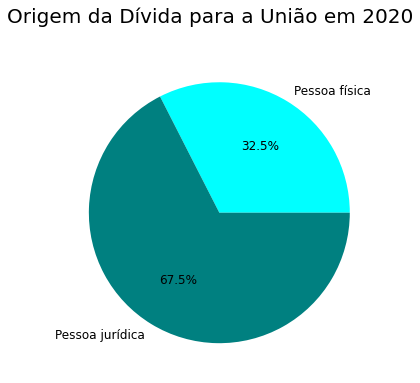

In [6]:
plt.figure(1, figsize=(10,6))
plt.suptitle('Origem da Dívida para a União em 2020', fontsize=20)

counts = divida2020.VALOR_CONSOLIDADO.sort_values()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['cyan', 'teal'], textprops={'size': 'larger'})

plt.show()

In [7]:
legenda = "Distribuição da dívida (oficial) de {} bilhões de reais para a união em 2020."
div = round((divida2020['VALOR_CONSOLIDADO'][0] + divida2020['VALOR_CONSOLIDADO'][1]) / 10**9, 2)
print(legenda.format(div))

Distribuição da dívida (oficial) de 249.48 bilhões de reais para a união em 2020.
